In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import GridSearchCV
import keras
from scikeras.wrappers import KerasRegressor
from sklearn.metrics import make_scorer
from sklearn.metrics import mean_squared_error
# No module named 'tensorflow'
"""
Data description: 
Gas turbine (GT1) 
Generator Watts Max Selected {Avg}
Exhaust Temp Median Corrected By Average {Avg}
Compressor Inlet Temperature {Avg}
IGV angle in deg {Avg}
Compressor Discharge Press Max Select {Avg}
Compressor Discharge Temperature {Avg}
"""
def start():
    return None

In [9]:
# read dataset from the file
filename = 'interview data.xlsx'
df = pd.read_excel(filename)
# Drop TimeStamp
df = df.drop(['TimeStamp'], axis=1)
# Five independent Variables
med_exh_tem = df['GT1 Exhaust Temp Median Corrected By Average {Avg}']
IGV_ang = df['GT1 IGV angle in deg {Avg}']
com_disch_pre_max = df['GT1 Compressor Discharge Press Max Select {Avg}']
com_inlet_tem = df['GT1 Compressor Inlet Temperature {Avg}']
com_disch_tem = df['GT1 Compressor Discharge Temperature {Avg}']
# one dependent Variable
gen_max_wat = df['GT1 Generator Watts Max Selected {Avg}']

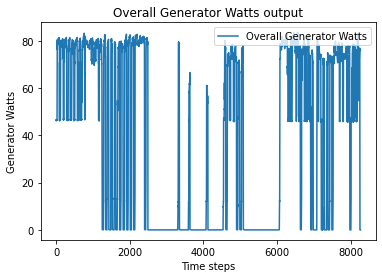

In [10]:
# plot the dataset (GT1 Generator Watts Max Selected {Avg})
plt.plot(gen_max_wat,label = 'Overall Generator Watts')
plt.title('Overall Generator Watts output')
plt.xlabel('Time steps')
plt.ylabel('Generator Watts')
plt.legend(loc = 1)
plt.show()

In [11]:
# There are some output = 0, turbine may be broken, find the most related variable.(changed a lot)
sel_data = df[df['GT1 Generator Watts Max Selected {Avg}'] < 1]
print(sel_data.shape)

(3754, 6)


In [12]:
# Get the pearson correlation between each other
pearsoncorr0 = sel_data.corr(method='pearson')
pd.set_option('display.max_columns', 6)
print(pearsoncorr0)

                                                    GT1 Generator Watts Max Selected {Avg}  \
GT1 Generator Watts Max Selected {Avg}                                            1.000000   
GT1 Exhaust Temp Median Corrected By Average {Avg}                                0.523754   
GT1 Compressor Inlet Temperature {Avg}                                            0.248728   
GT1 IGV angle in deg {Avg}                                                        0.148271   
GT1 Compressor Discharge Press Max Select {Avg}                                   0.134102   
GT1 Compressor Discharge Temperature {Avg}                                        0.488317   

                                                    GT1 Exhaust Temp Median Corrected By Average {Avg}  \
GT1 Generator Watts Max Selected {Avg}                                                       0.523754    
GT1 Exhaust Temp Median Corrected By Average {Avg}                                           1.000000    
GT1 Compressor Inlet Te

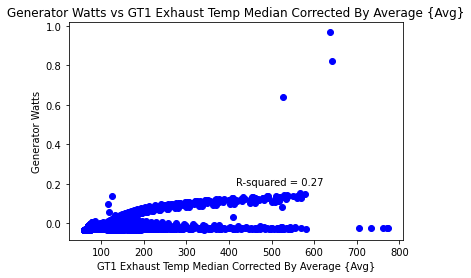

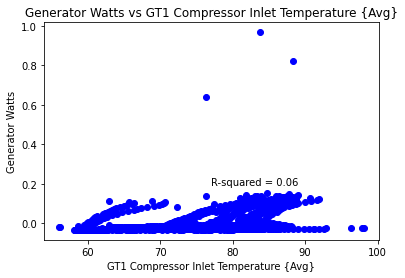

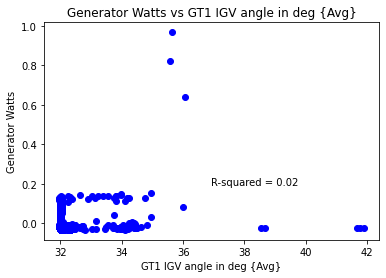

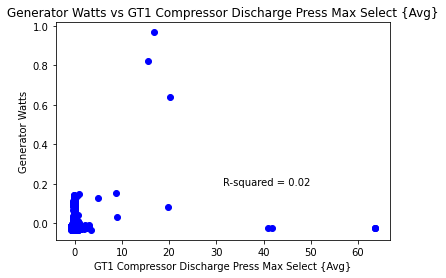

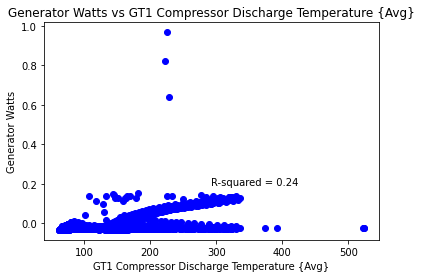

In [13]:
# Analyze the selected dataset:
# Five independent Variables
med_exh_tem0 = sel_data['GT1 Exhaust Temp Median Corrected By Average {Avg}']
com_inlet_tem0 = sel_data['GT1 Compressor Inlet Temperature {Avg}']
IGV_ang0 = sel_data['GT1 IGV angle in deg {Avg}']
com_disch_pre_max0 = sel_data['GT1 Compressor Discharge Press Max Select {Avg}']
com_disch_tem0 = sel_data['GT1 Compressor Discharge Temperature {Avg}']
# one dependent Variable
gen_max_wat0 = sel_data['GT1 Generator Watts Max Selected {Avg}']

# calculate R square
# Create bars and choose color
name = []
new_vars = [med_exh_tem0, com_inlet_tem0, IGV_ang0, com_disch_pre_max0, com_disch_tem0]
for col in sel_data.columns:
    name.append([col])
len_var = len(new_vars)
for i in range(len_var):
    plt.plot(new_vars[i], gen_max_wat0, 'o', color='blue')
    # Add title and axis names
    plt.title('Generator Watts vs {}'.format(name[i+1][0]))
    plt.xlabel('{}'.format(name[i+1][0]))
    plt.ylabel('Generator Watts')
    corr_matrix = np.corrcoef(new_vars[i], gen_max_wat0)
    corr = corr_matrix[0,1]
    R_sq = corr**2
    plt.text(0.5, 0.25, 'R-squared = %0.2f' % R_sq, transform=plt.gca().transAxes)
    plt.show()

In [14]:
# For variable: 'GT1 Compressor Discharge Press Max Select {Avg}'
# , most of the experimental data is concentrated in the lower left corner (0-5)
# For variable: ''GT1 IGV angle in deg {Avg}''
# , most of the experimental data is concentrated in the lower left corner (32-35)
# Use these two variable to predict the output is 0
def analyze():
    return None

In [15]:
# Create more variable based on the variables provide
# Difference between two consecutive numbers, usually, sudden changes may lead to failure accident, 
# decrease the Productivity
# Because the value change for each of the variables will certainly affect gas turbine performance, 
# like Compressor Inlet temperature suddenly change a lot
name_difference = ['med_exh_tem', 'com_inlet_tem', 'IGV_ang', 'com_disch_pre_max', 'com_disch_tem']
vars = [med_exh_tem, com_inlet_tem, IGV_ang, com_disch_pre_max, com_disch_tem]
for i in range(len(vars)):
    var = vars[i]
    df[name_difference[i] + '_difference'] = var - var.shift(1)

# Average between three consecutive numbers, two will overlap
# Avoid some sudden changes that lead to inaccurate data
for i in range(len(vars)):
    var = vars[i]
    df[name_difference[i] + '_average'] = (var.shift(1) + var.shift(2) + var)/3

In [16]:
# The first two rows include None value 
df = df.dropna()
print(df.shape)

(8258, 16)


In [17]:
# Dropped two rows compare with the original dataset
med_exh_tem_dif = df['med_exh_tem_difference']
com_inlet_tem_dif = df['com_inlet_tem_difference']
IGV_ang_dif = df['IGV_ang_difference']
com_disch_pre_max_dif = df['com_disch_pre_max_difference']
com_disch_tem_dif = df['com_disch_tem_difference']

med_exh_tem_ave = df['med_exh_tem_average']
com_inlet_tem_ave = df['com_inlet_tem_average']
IGV_ang_ave = df['IGV_ang_average']
com_disch_pre_max_ave = df['com_disch_pre_max_average']
com_disch_tem_ave = df['com_disch_tem_average']

med_exh_tem = df['GT1 Exhaust Temp Median Corrected By Average {Avg}']
com_inlet_tem = df['GT1 Compressor Inlet Temperature {Avg}']
IGV_ang = df['GT1 IGV angle in deg {Avg}']
com_disch_pre_max = df['GT1 Compressor Discharge Press Max Select {Avg}']
com_disch_tem = df['GT1 Compressor Discharge Temperature {Avg}']
# one dependent Variable
gen_max_wat = df['GT1 Generator Watts Max Selected {Avg}']

# create new dataset
new_vars = [med_exh_tem, com_inlet_tem, IGV_ang, com_disch_pre_max, com_disch_tem,
            med_exh_tem_dif, com_inlet_tem_dif, IGV_ang_dif, com_disch_pre_max_dif, com_disch_tem_dif,
            med_exh_tem_ave, com_inlet_tem_ave, IGV_ang_ave, com_disch_pre_max_ave, com_disch_tem_ave
            ]

In [18]:
# Now, there are 15 independent Variables and 1 dependent variable
# Get the pearson correlation between each other
pearsoncorr = df.corr(method='pearson')
pd.set_option('display.max_columns', 20)
print(pearsoncorr)

                                                    GT1 Generator Watts Max Selected {Avg}  \
GT1 Generator Watts Max Selected {Avg}                                            1.000000   
GT1 Exhaust Temp Median Corrected By Average {Avg}                                0.934648   
GT1 Compressor Inlet Temperature {Avg}                                            0.081964   
GT1 IGV angle in deg {Avg}                                                        0.993491   
GT1 Compressor Discharge Press Max Select {Avg}                                   0.990797   
GT1 Compressor Discharge Temperature {Avg}                                        0.934783   
med_exh_tem_difference                                                            0.014318   
com_inlet_tem_difference                                                         -0.053145   
IGV_ang_difference                                                                0.052717   
com_disch_pre_max_difference                                

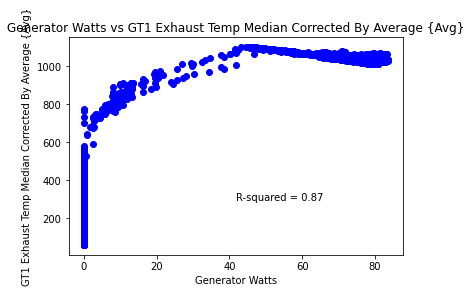

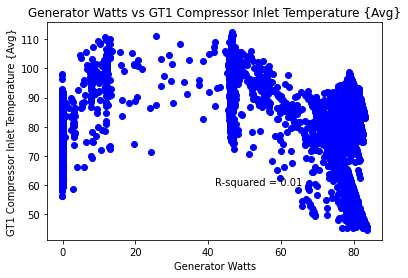

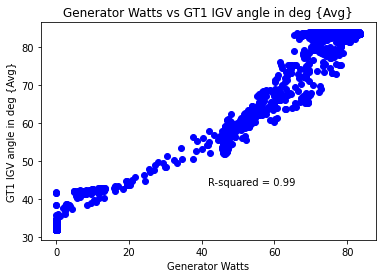

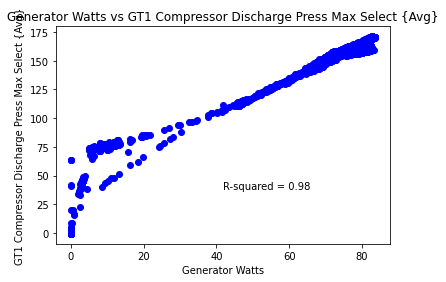

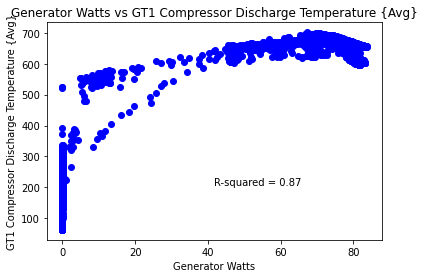

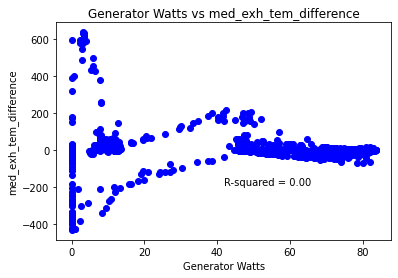

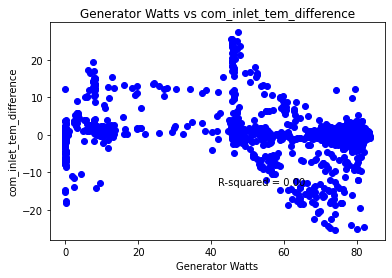

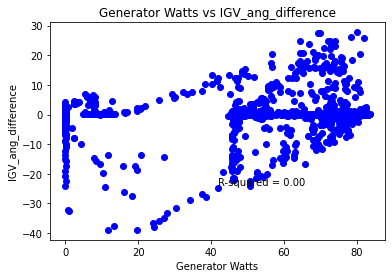

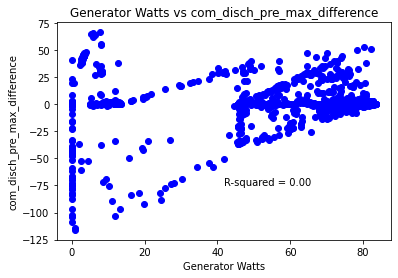

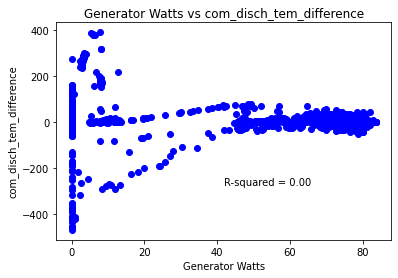

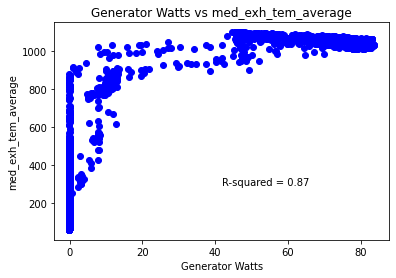

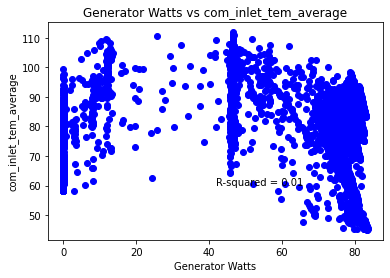

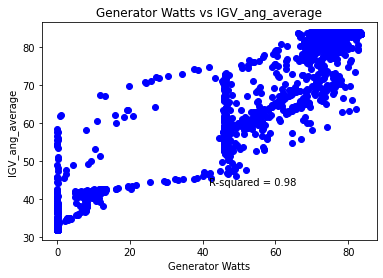

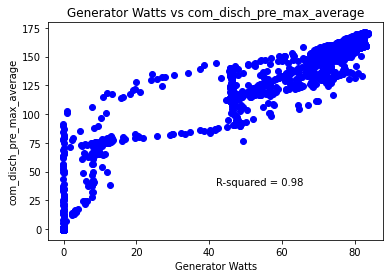

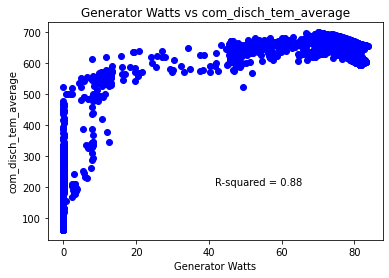

In [22]:
# calculate R square
# Create bars and choose color
name = []
for col in df.columns:
    name.append([col])
len_var = len(new_vars)

for i in range(len_var):
    plt.plot(gen_max_wat, new_vars[i], 'o', color='blue')
    # Add title and axis names
    plt.title('Generator Watts vs {}'.format(name[i+1][0]))
    plt.ylabel('{}'.format(name[i+1][0]))
    plt.xlabel('Generator Watts')
    corr_matrix = np.corrcoef(gen_max_wat, new_vars[i])
    corr = corr_matrix[0,1]
    R_sq = corr**2
    plt.text(0.5, 0.25, 'R-squared = %0.2f' % R_sq, transform=plt.gca().transAxes)
    plt.show()

In [129]:
# Selected variable based on above analyze:
# GT1 Exhaust Temp Median Corrected By Average {Avg}                                0.934648
# GT1 IGV angle in deg {Avg}                                                        0.993491
# GT1 Compressor Discharge Press Max Select {Avg}                                   0.990797
# GT1 Compressor Discharge Temperature {Avg}                                        0.934783
# med_exh_tem_average                                                               0.934844
# IGV_ang_average                                                                   0.989188
# com_disch_pre_max_average                                                         0.987999
# com_disch_tem_average                                                             0.935702
select_variable = ['GT1 Exhaust Temp Median Corrected By Average {Avg}','GT1 IGV angle in deg {Avg}', 'GT1 Compressor Discharge Press Max Select {Avg}',
              'GT1 Compressor Discharge Temperature {Avg}', 'med_exh_tem_average', 'IGV_ang_average','com_disch_pre_max_average','com_disch_tem_average']
gen_wat = ['GT1 Generator Watts Max Selected {Avg}']

X = df[select_variable].values
y = df[gen_wat].values

In [130]:
# Sandardization of data
PredictorScaler = MinMaxScaler(feature_range = (0, 1))
TargetVarScaler = MinMaxScaler(feature_range = (0, 1))

# Generating the standardized values of X and y
X = PredictorScaler.fit_transform(X)
y = TargetVarScaler.fit_transform(y)

In [25]:
# Split the data into training and testing set, 30% as test dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(5780, 8) (5780, 1) (2478, 8) (2478, 1)


In [60]:
# Finding best hyperparameters of ANN using GridSearchCV
def make_regression_ann(Optimizer_trial):
    model = Sequential()
    # Defining the Input layer (8) and FIRST hidden layer (7),
    model.add(Dense(units=7, input_dim=8, kernel_initializer='normal', activation='relu'))
    # Defining the Second layer of the model
    model.add(Dense(units=7, kernel_initializer='normal', activation='tanh'))
    model.add(Dense(1, kernel_initializer='normal'))
    model.compile(loss='mean_squared_error', optimizer=Optimizer_trial)
    return model

# Defining a custom function to calculate accuracy
def Accuracy_Score(orig, pred):
    corr_matrix = np.corrcoef(orig, pred)
    corr = corr_matrix[0,1]
    R_sq = corr**2
    
    print('#' * 50, 'R Squared:', R_sq)
    return R_sq

In [47]:
# Creating the regression ANN model
# RegModel = KerasRegressor(make_regression_ann, verbose=0)
RegModel = keras.wrappers.scikit_learn.KerasRegressor(make_regression_ann, verbose=0)
custom_Scoring = make_scorer(Accuracy_Score, greater_is_better=True)
# Listing all the parameters to try
Parameter_Trials = {'batch_size': [10, 20, 30],
                    'epochs': [10, 15, 20],
                    'Optimizer_trial': ['adam', 'rmsprop']
                    }
# Creating the Grid search space
grid_search = GridSearchCV(estimator=RegModel,
                           param_grid=Parameter_Trials,
                           scoring=custom_Scoring,
                           cv=5)

grid_search = grid_search.fit(X_train, y_train, verbose=1)
# print('Printing Best parameters: ', grid_search.best_params_)

<ipython-input-47-c746bf7456cb>:4: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead.
  RegModel = keras.wrappers.scikit_learn.KerasRegressor(make_regression_ann, verbose=0)


Epoch 1/10
463/463 [==============================] - 1s 552us/step - loss: 0.0682
Epoch 2/10
463/463 [==============================] - 0s 608us/step - loss: 0.0017
Epoch 3/10
463/463 [==============================] - 0s 529us/step - loss: 0.0015
Epoch 4/10
463/463 [==============================] - 0s 543us/step - loss: 0.0014
Epoch 5/10
463/463 [==============================] - 0s 570us/step - loss: 0.0014
Epoch 6/10
463/463 [==============================] - 0s 560us/step - loss: 0.0013
Epoch 7/10
463/463 [==============================] - 0s 553us/step - loss: 0.0013
Epoch 8/10
463/463 [==============================] - 0s 554us/step - loss: 0.0013
Epoch 9/10
463/463 [==============================] - 0s 547us/step - loss: 0.0012
Epoch 10/10
463/463 [==============================] - 0s 556us/step - loss: 0.0012
###################################################################### Accuracy: -445709.8691885026
Epoch 1/10
463/463 [==============================] - 0s 551us/step -

<ipython-input-44-df39e3b3ae76>:14: RuntimeWarning: divide by zero encountered in true_divide
  MAPE = np.mean(100 * (np.abs(orig - pred) / orig))


463/463 [==============================] - 0s 545us/step - loss: 0.0701
Epoch 2/15
463/463 [==============================] - 0s 537us/step - loss: 0.0035
Epoch 3/15
463/463 [==============================] - 0s 551us/step - loss: 0.0013
Epoch 4/15
463/463 [==============================] - 0s 533us/step - loss: 0.0011
Epoch 5/15
463/463 [==============================] - 0s 554us/step - loss: 0.0010
Epoch 6/15
463/463 [==============================] - 0s 543us/step - loss: 9.2755e-04
Epoch 7/15
463/463 [==============================] - 0s 557us/step - loss: 8.3054e-04
Epoch 8/15
463/463 [==============================] - 0s 541us/step - loss: 7.6015e-04
Epoch 9/15
463/463 [==============================] - 0s 544us/step - loss: 6.5814e-04
Epoch 10/15
463/463 [==============================] - 0s 542us/step - loss: 5.6786e-04
Epoch 11/15
463/463 [==============================] - 0s 536us/step - loss: 4.8599e-04
Epoch 12/15
463/463 [==============================] - 0s 531us/step - l

<ipython-input-44-df39e3b3ae76>:14: RuntimeWarning: divide by zero encountered in true_divide
  MAPE = np.mean(100 * (np.abs(orig - pred) / orig))


463/463 [==============================] - 0s 540us/step - loss: 0.0603
Epoch 2/20
463/463 [==============================] - 0s 539us/step - loss: 0.0014
Epoch 3/20
463/463 [==============================] - 0s 579us/step - loss: 0.0013
Epoch 4/20
463/463 [==============================] - 0s 551us/step - loss: 0.0012
Epoch 5/20
463/463 [==============================] - 0s 566us/step - loss: 0.0011
Epoch 6/20
463/463 [==============================] - 0s 551us/step - loss: 0.0010
Epoch 7/20
463/463 [==============================] - 0s 540us/step - loss: 9.6326e-04
Epoch 8/20
463/463 [==============================] - 0s 552us/step - loss: 9.0325e-04
Epoch 9/20
463/463 [==============================] - 0s 553us/step - loss: 8.2304e-04
Epoch 10/20
463/463 [==============================] - 0s 539us/step - loss: 7.4473e-04
Epoch 11/20
463/463 [==============================] - 0s 539us/step - loss: 6.9741e-04
Epoch 12/20
463/463 [==============================] - 0s 542us/step - loss:

<ipython-input-44-df39e3b3ae76>:14: RuntimeWarning: divide by zero encountered in true_divide
  MAPE = np.mean(100 * (np.abs(orig - pred) / orig))


232/232 [==============================] - 0s 583us/step - loss: 0.1187
Epoch 2/10
232/232 [==============================] - 0s 574us/step - loss: 0.0060
Epoch 3/10
232/232 [==============================] - 0s 646us/step - loss: 0.0018
Epoch 4/10
232/232 [==============================] - 0s 612us/step - loss: 0.0016
Epoch 5/10
232/232 [==============================] - 0s 566us/step - loss: 0.0016
Epoch 6/10
232/232 [==============================] - 0s 596us/step - loss: 0.0015
Epoch 7/10
232/232 [==============================] - 0s 546us/step - loss: 0.0015
Epoch 8/10
232/232 [==============================] - 0s 555us/step - loss: 0.0014
Epoch 9/10
232/232 [==============================] - 0s 546us/step - loss: 0.0014
Epoch 10/10
232/232 [==============================] - 0s 548us/step - loss: 0.0013
###################################################################### Accuracy: -447421.6457410067
Epoch 1/10
232/232 [==============================] - 0s 566us/step - loss: 0.11

<ipython-input-44-df39e3b3ae76>:14: RuntimeWarning: divide by zero encountered in true_divide
  MAPE = np.mean(100 * (np.abs(orig - pred) / orig))


232/232 [==============================] - 0s 570us/step - loss: 0.1408
Epoch 2/15
232/232 [==============================] - 0s 549us/step - loss: 0.0016
Epoch 3/15
232/232 [==============================] - 0s 554us/step - loss: 0.0014
Epoch 4/15
232/232 [==============================] - 0s 556us/step - loss: 0.0014
Epoch 5/15
232/232 [==============================] - 0s 561us/step - loss: 0.0013
Epoch 6/15
232/232 [==============================] - 0s 548us/step - loss: 0.0013
Epoch 7/15
232/232 [==============================] - 0s 548us/step - loss: 0.0013
Epoch 8/15
232/232 [==============================] - 0s 554us/step - loss: 0.0012
Epoch 9/15
232/232 [==============================] - 0s 560us/step - loss: 0.0012
Epoch 10/15
232/232 [==============================] - 0s 549us/step - loss: 0.0012
Epoch 11/15
232/232 [==============================] - 0s 545us/step - loss: 0.0012
Epoch 12/15
232/232 [==============================] - 0s 554us/step - loss: 0.0012
Epoch 13/15


<ipython-input-44-df39e3b3ae76>:14: RuntimeWarning: divide by zero encountered in true_divide
  MAPE = np.mean(100 * (np.abs(orig - pred) / orig))


232/232 [==============================] - 0s 607us/step - loss: 0.1128
Epoch 2/20
232/232 [==============================] - 0s 615us/step - loss: 0.0032
Epoch 3/20
232/232 [==============================] - 0s 600us/step - loss: 0.0016
Epoch 4/20
232/232 [==============================] - 0s 570us/step - loss: 0.0015
Epoch 5/20
232/232 [==============================] - 0s 577us/step - loss: 0.0014
Epoch 6/20
232/232 [==============================] - 0s 576us/step - loss: 0.0014
Epoch 7/20
232/232 [==============================] - 0s 858us/step - loss: 0.0014
Epoch 8/20
232/232 [==============================] - 0s 1ms/step - loss: 0.0014
Epoch 9/20
232/232 [==============================] - 0s 937us/step - loss: 0.0013
Epoch 10/20
232/232 [==============================] - 0s 757us/step - loss: 0.0013
Epoch 11/20
232/232 [==============================] - 0s 796us/step - loss: 0.0013
Epoch 12/20
232/232 [==============================] - 0s 628us/step - loss: 0.0013
Epoch 13/20
23

<ipython-input-44-df39e3b3ae76>:14: RuntimeWarning: divide by zero encountered in true_divide
  MAPE = np.mean(100 * (np.abs(orig - pred) / orig))


155/155 [==============================] - 0s 574us/step - loss: 0.1855
Epoch 2/10
155/155 [==============================] - 0s 544us/step - loss: 0.0051
Epoch 3/10
155/155 [==============================] - 0s 540us/step - loss: 0.0016
Epoch 4/10
155/155 [==============================] - 0s 551us/step - loss: 0.0014
Epoch 5/10
155/155 [==============================] - 0s 543us/step - loss: 0.0014
Epoch 6/10
155/155 [==============================] - 0s 553us/step - loss: 0.0014
Epoch 7/10
155/155 [==============================] - 0s 550us/step - loss: 0.0014
Epoch 8/10
155/155 [==============================] - 0s 537us/step - loss: 0.0013
Epoch 9/10
155/155 [==============================] - 0s 546us/step - loss: 0.0013
Epoch 10/10
155/155 [==============================] - 0s 546us/step - loss: 0.0013
###################################################################### Accuracy: -446518.66393324314
Epoch 1/10
155/155 [==============================] - 0s 587us/step - loss: 0.1

<ipython-input-44-df39e3b3ae76>:14: RuntimeWarning: divide by zero encountered in true_divide
  MAPE = np.mean(100 * (np.abs(orig - pred) / orig))


155/155 [==============================] - 0s 597us/step - loss: 0.2127
Epoch 2/15
155/155 [==============================] - 0s 540us/step - loss: 0.0054
Epoch 3/15
155/155 [==============================] - 0s 533us/step - loss: 0.0016
Epoch 4/15
155/155 [==============================] - 0s 554us/step - loss: 0.0015
Epoch 5/15
155/155 [==============================] - 0s 546us/step - loss: 0.0015
Epoch 6/15
155/155 [==============================] - 0s 541us/step - loss: 0.0014
Epoch 7/15
155/155 [==============================] - 0s 553us/step - loss: 0.0014
Epoch 8/15
155/155 [==============================] - 0s 544us/step - loss: 0.0014
Epoch 9/15
155/155 [==============================] - 0s 539us/step - loss: 0.0014
Epoch 10/15
155/155 [==============================] - 0s 541us/step - loss: 0.0013
Epoch 11/15
155/155 [==============================] - 0s 541us/step - loss: 0.0013
Epoch 12/15
155/155 [==============================] - 0s 537us/step - loss: 0.0013
Epoch 13/15


<ipython-input-44-df39e3b3ae76>:14: RuntimeWarning: divide by zero encountered in true_divide
  MAPE = np.mean(100 * (np.abs(orig - pred) / orig))


155/155 [==============================] - 0s 573us/step - loss: 0.1657
Epoch 2/20
155/155 [==============================] - 0s 533us/step - loss: 0.0061
Epoch 3/20
155/155 [==============================] - 0s 571us/step - loss: 0.0022
Epoch 4/20
155/155 [==============================] - 0s 537us/step - loss: 0.0015
Epoch 5/20
155/155 [==============================] - 0s 533us/step - loss: 0.0015
Epoch 6/20
155/155 [==============================] - 0s 571us/step - loss: 0.0014
Epoch 7/20
155/155 [==============================] - 0s 571us/step - loss: 0.0014
Epoch 8/20
155/155 [==============================] - 0s 577us/step - loss: 0.0014
Epoch 9/20
155/155 [==============================] - 0s 534us/step - loss: 0.0014
Epoch 10/20
155/155 [==============================] - 0s 539us/step - loss: 0.0014
Epoch 11/20
155/155 [==============================] - 0s 545us/step - loss: 0.0013
Epoch 12/20
155/155 [==============================] - 0s 543us/step - loss: 0.0013
Epoch 13/20


<ipython-input-44-df39e3b3ae76>:14: RuntimeWarning: divide by zero encountered in true_divide
  MAPE = np.mean(100 * (np.abs(orig - pred) / orig))


463/463 [==============================] - 1s 560us/step - loss: 0.0767
Epoch 2/10
463/463 [==============================] - 0s 556us/step - loss: 0.0015
Epoch 3/10
463/463 [==============================] - 0s 534us/step - loss: 0.0014
Epoch 4/10
463/463 [==============================] - 0s 532us/step - loss: 0.0014
Epoch 5/10
463/463 [==============================] - 0s 582us/step - loss: 0.0013
Epoch 6/10
463/463 [==============================] - 0s 522us/step - loss: 0.0013
Epoch 7/10
463/463 [==============================] - 0s 527us/step - loss: 0.0013
Epoch 8/10
463/463 [==============================] - 0s 519us/step - loss: 0.0012
Epoch 9/10
463/463 [==============================] - 0s 543us/step - loss: 0.0012
Epoch 10/10
463/463 [==============================] - 0s 544us/step - loss: 0.0012
###################################################################### Accuracy: -462073.31443996937
Epoch 1/10
463/463 [==============================] - 1s 550us/step - loss: 0.0

<ipython-input-44-df39e3b3ae76>:14: RuntimeWarning: divide by zero encountered in true_divide
  MAPE = np.mean(100 * (np.abs(orig - pred) / orig))


463/463 [==============================] - 1s 560us/step - loss: 0.0607
Epoch 2/15
463/463 [==============================] - 0s 565us/step - loss: 0.0016
Epoch 3/15
463/463 [==============================] - 0s 530us/step - loss: 0.0015
Epoch 4/15
463/463 [==============================] - 0s 540us/step - loss: 0.0014
Epoch 5/15
463/463 [==============================] - 0s 520us/step - loss: 0.0014
Epoch 6/15
463/463 [==============================] - 0s 525us/step - loss: 0.0013
Epoch 7/15
463/463 [==============================] - 0s 529us/step - loss: 0.0013
Epoch 8/15
463/463 [==============================] - 0s 522us/step - loss: 0.0013
Epoch 9/15
463/463 [==============================] - 0s 521us/step - loss: 0.0013
Epoch 10/15
463/463 [==============================] - 0s 523us/step - loss: 0.0013
Epoch 11/15
463/463 [==============================] - 0s 526us/step - loss: 0.0013
Epoch 12/15
463/463 [==============================] - 0s 522us/step - loss: 0.0012
Epoch 13/15


<ipython-input-44-df39e3b3ae76>:14: RuntimeWarning: divide by zero encountered in true_divide
  MAPE = np.mean(100 * (np.abs(orig - pred) / orig))


463/463 [==============================] - 1s 541us/step - loss: 0.0614
Epoch 2/20
463/463 [==============================] - 0s 522us/step - loss: 0.0016
Epoch 3/20
463/463 [==============================] - 0s 597us/step - loss: 0.0012
Epoch 4/20
463/463 [==============================] - 0s 551us/step - loss: 0.0011
Epoch 5/20
463/463 [==============================] - 0s 599us/step - loss: 9.4115e-04
Epoch 6/20
463/463 [==============================] - 0s 560us/step - loss: 8.0948e-04
Epoch 7/20
463/463 [==============================] - 0s 524us/step - loss: 6.7328e-04
Epoch 8/20
463/463 [==============================] - 0s 526us/step - loss: 5.5867e-04
Epoch 9/20
463/463 [==============================] - 0s 603us/step - loss: 4.6147e-04
Epoch 10/20
463/463 [==============================] - 0s 539us/step - loss: 3.7248e-04
Epoch 11/20
463/463 [==============================] - 0s 522us/step - loss: 3.1890e-04
Epoch 12/20
463/463 [==============================] - 0s 548us/step

<ipython-input-44-df39e3b3ae76>:14: RuntimeWarning: divide by zero encountered in true_divide
  MAPE = np.mean(100 * (np.abs(orig - pred) / orig))


232/232 [==============================] - 0s 545us/step - loss: 0.1007
Epoch 2/10
232/232 [==============================] - 0s 509us/step - loss: 0.0031
Epoch 3/10
232/232 [==============================] - 0s 525us/step - loss: 0.0016
Epoch 4/10
232/232 [==============================] - 0s 511us/step - loss: 0.0015
Epoch 5/10
232/232 [==============================] - 0s 516us/step - loss: 0.0014
Epoch 6/10
232/232 [==============================] - 0s 509us/step - loss: 0.0013
Epoch 7/10
232/232 [==============================] - 0s 524us/step - loss: 0.0013
Epoch 8/10
232/232 [==============================] - 0s 510us/step - loss: 0.0012
Epoch 9/10
232/232 [==============================] - 0s 526us/step - loss: 0.0012
Epoch 10/10
232/232 [==============================] - 0s 511us/step - loss: 0.0011
###################################################################### Accuracy: -458351.8505393526
Epoch 1/10
232/232 [==============================] - 0s 541us/step - loss: 0.09

<ipython-input-44-df39e3b3ae76>:14: RuntimeWarning: divide by zero encountered in true_divide
  MAPE = np.mean(100 * (np.abs(orig - pred) / orig))


232/232 [==============================] - 0s 548us/step - loss: 0.2094
Epoch 2/15
232/232 [==============================] - 0s 512us/step - loss: 0.0070
Epoch 3/15
232/232 [==============================] - 0s 520us/step - loss: 0.0015
Epoch 4/15
232/232 [==============================] - 0s 514us/step - loss: 0.0014
Epoch 5/15
232/232 [==============================] - 0s 511us/step - loss: 0.0013
Epoch 6/15
232/232 [==============================] - 0s 511us/step - loss: 0.0013
Epoch 7/15
232/232 [==============================] - 0s 521us/step - loss: 0.0011
Epoch 8/15
232/232 [==============================] - 0s 520us/step - loss: 0.0011
Epoch 9/15
232/232 [==============================] - 0s 516us/step - loss: 0.0011
Epoch 10/15
232/232 [==============================] - 0s 514us/step - loss: 0.0011
Epoch 11/15
232/232 [==============================] - 0s 519us/step - loss: 0.0010
Epoch 12/15
232/232 [==============================] - 0s 513us/step - loss: 9.8540e-04
Epoch 13

<ipython-input-44-df39e3b3ae76>:14: RuntimeWarning: divide by zero encountered in true_divide
  MAPE = np.mean(100 * (np.abs(orig - pred) / orig))


232/232 [==============================] - 0s 550us/step - loss: 0.1048
Epoch 2/20
232/232 [==============================] - 0s 511us/step - loss: 0.0028
Epoch 3/20
232/232 [==============================] - 0s 518us/step - loss: 0.0016
Epoch 4/20
232/232 [==============================] - 0s 515us/step - loss: 0.0015
Epoch 5/20
232/232 [==============================] - 0s 520us/step - loss: 0.0015
Epoch 6/20
232/232 [==============================] - 0s 507us/step - loss: 0.0014
Epoch 7/20
232/232 [==============================] - 0s 508us/step - loss: 0.0014
Epoch 8/20
232/232 [==============================] - 0s 507us/step - loss: 0.0014
Epoch 9/20
232/232 [==============================] - 0s 519us/step - loss: 0.0013
Epoch 10/20
232/232 [==============================] - 0s 514us/step - loss: 0.0013
Epoch 11/20
232/232 [==============================] - 0s 507us/step - loss: 0.0013
Epoch 12/20
232/232 [==============================] - 0s 508us/step - loss: 0.0013
Epoch 13/20


<ipython-input-44-df39e3b3ae76>:14: RuntimeWarning: divide by zero encountered in true_divide
  MAPE = np.mean(100 * (np.abs(orig - pred) / orig))


155/155 [==============================] - 0s 647us/step - loss: 0.1964
Epoch 2/10
155/155 [==============================] - 0s 691us/step - loss: 0.0098
Epoch 3/10
155/155 [==============================] - 0s 587us/step - loss: 0.0019
Epoch 4/10
155/155 [==============================] - 0s 522us/step - loss: 0.0016
Epoch 5/10
155/155 [==============================] - 0s 520us/step - loss: 0.0015
Epoch 6/10
155/155 [==============================] - 0s 511us/step - loss: 0.0015
Epoch 7/10
155/155 [==============================] - 0s 542us/step - loss: 0.0014
Epoch 8/10
155/155 [==============================] - 0s 529us/step - loss: 0.0014
Epoch 9/10
155/155 [==============================] - 0s 514us/step - loss: 0.0014
Epoch 10/10
155/155 [==============================] - 0s 520us/step - loss: 0.0013
###################################################################### Accuracy: -454731.5546400718
Epoch 1/10
155/155 [==============================] - 0s 560us/step - loss: 0.18

<ipython-input-44-df39e3b3ae76>:14: RuntimeWarning: divide by zero encountered in true_divide
  MAPE = np.mean(100 * (np.abs(orig - pred) / orig))


155/155 [==============================] - 0s 566us/step - loss: 0.1460
Epoch 2/15
155/155 [==============================] - 0s 511us/step - loss: 0.0089
Epoch 3/15
155/155 [==============================] - 0s 522us/step - loss: 0.0024
Epoch 4/15
155/155 [==============================] - 0s 513us/step - loss: 0.0014
Epoch 5/15
155/155 [==============================] - 0s 529us/step - loss: 0.0013
Epoch 6/15
155/155 [==============================] - 0s 511us/step - loss: 0.0012
Epoch 7/15
155/155 [==============================] - 0s 516us/step - loss: 0.0012
Epoch 8/15
155/155 [==============================] - 0s 513us/step - loss: 0.0011
Epoch 9/15
155/155 [==============================] - 0s 520us/step - loss: 0.0011
Epoch 10/15
155/155 [==============================] - 0s 513us/step - loss: 0.0010
Epoch 11/15
155/155 [==============================] - 0s 514us/step - loss: 9.6570e-04
Epoch 12/15
155/155 [==============================] - 0s 510us/step - loss: 9.1985e-04
Epoc

<ipython-input-44-df39e3b3ae76>:14: RuntimeWarning: divide by zero encountered in true_divide
  MAPE = np.mean(100 * (np.abs(orig - pred) / orig))


155/155 [==============================] - 0s 572us/step - loss: 0.1779
Epoch 2/20
155/155 [==============================] - 0s 513us/step - loss: 0.0075
Epoch 3/20
155/155 [==============================] - 0s 524us/step - loss: 0.0019
Epoch 4/20
155/155 [==============================] - 0s 523us/step - loss: 0.0017
Epoch 5/20
155/155 [==============================] - 0s 569us/step - loss: 0.0016
Epoch 6/20
155/155 [==============================] - 0s 524us/step - loss: 0.0015
Epoch 7/20
155/155 [==============================] - 0s 512us/step - loss: 0.0015
Epoch 8/20
155/155 [==============================] - 0s 516us/step - loss: 0.0014
Epoch 9/20
155/155 [==============================] - 0s 555us/step - loss: 0.0014
Epoch 10/20
155/155 [==============================] - 0s 610us/step - loss: 0.0014
Epoch 11/20
155/155 [==============================] - 0s 575us/step - loss: 0.0014
Epoch 12/20
155/155 [==============================] - 0s 551us/step - loss: 0.0013
Epoch 13/20


<ipython-input-44-df39e3b3ae76>:14: RuntimeWarning: divide by zero encountered in true_divide
  MAPE = np.mean(100 * (np.abs(orig - pred) / orig))
/Applications/miniconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:969: UserWarning: One or more of the test scores are non-finite: [-inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf -inf
 -inf -inf -inf -inf]
  warnings.warn(
/Applications/miniconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:978: RuntimeWarning: invalid value encountered in subtract
  (array - array_means[:, np.newaxis]) ** 2, axis=1, weights=weights


578/578 [==============================] - 1s 544us/step - loss: 0.0566
Epoch 2/10
578/578 [==============================] - 0s 520us/step - loss: 0.0024
Epoch 3/10
578/578 [==============================] - 0s 515us/step - loss: 0.0012
Epoch 4/10
578/578 [==============================] - 0s 516us/step - loss: 0.0011
Epoch 5/10
578/578 [==============================] - 0s 515us/step - loss: 0.0010
Epoch 6/10
578/578 [==============================] - 0s 810us/step - loss: 8.7798e-04
Epoch 7/10
578/578 [==============================] - 0s 569us/step - loss: 7.7285e-04
Epoch 8/10
578/578 [==============================] - 0s 557us/step - loss: 6.3423e-04
Epoch 9/10
578/578 [==============================] - 0s 634us/step - loss: 5.2113e-04
Epoch 10/10
578/578 [==============================] - 0s 545us/step - loss: 3.9407e-04


In [48]:
print('Printing Best parameters: ', grid_search.best_params_)

Printing Best parameters:  {'Optimizer_trial': 'adam', 'batch_size': 10, 'epochs': 10}


In [77]:
# Training the ANN model with the best parameters
# Fitting the ANN to the Training set
model = Sequential()
model.add(Dense(units=7, input_dim=8, kernel_initializer='normal', activation='relu')) # Defining the Input layer and FIRST hidden layer, both are same!
model.add(Dense(units=7, kernel_initializer='normal', activation='tanh')) # Defining the Second layer of the model
model.add(Dense(1, kernel_initializer='normal')) # The output neuron is a single fully connected node
model.compile(loss='mean_squared_error', optimizer='adam') # Compiling the model
model.fit(X_train, y_train ,batch_size = 10, epochs = 10, verbose=0)
Predictions=model.predict(X_test)

Predictions=TargetVarScaler.inverse_transform(Predictions) # back to original value
y_test_orig=TargetVarScaler.inverse_transform(y_test)
Test_Data=PredictorScaler.inverse_transform(X_test)

TestingData=pd.DataFrame(data=Test_Data, columns=select_variable)
TestingData['Generate Watts']=y_test_orig
TestingData['Predicted Watts']=Predictions
TestingData.head()


# Calculate the error between the actual value and the predicted value
Error=abs(TestingData['Generate Watts']-TestingData['Predicted Watts'])# Computing the absolute percent error
TestingData['Error']=Error

# Finding the R^2 of the model
corr_matrix = np.corrcoef(TestingData['Generate Watts'], TestingData['Predicted Watts'])
corr = corr_matrix[0,1]
R_sq = corr**2
print('The R^2 of ANN model is:', R_sq)
TestingData.head()

The R^2 of ANN model is: 0.9989965497735229


,GT1 Exhaust Temp Median Corrected By Average {Avg},GT1 IGV angle in deg {Avg},GT1 Compressor Discharge Press Max Select {Avg},GT1 Compressor Discharge Temperature {Avg},med_exh_tem_average,IGV_ang_average,com_disch_pre_max_average,com_disch_tem_average,Generate Watts,Predicted Watts,Error
0,72.354564,31.998320,0.024077,74.766100,72.475890,32.004072,0.004851,74.759624,-0.025003,0.112490,0.137493
1,73.804041,32.082043,-0.028945,74.357519,73.738696,32.075006,-0.031021,74.274502,-0.020082,0.112490,0.132572
2,1049.356520,83.985763,158.930957,613.074592,1049.140614,83.985676,158.994308,612.852848,80.174592,79.932526,0.242066
3,69.316331,31.980394,-0.550947,67.468134,69.298917,31.980366,-0.541962,67.462462,-0.017439,0.112490,0.129929
4,1053.125764,72.968475,146.110998,658.507256,1063.494101,65.120012,136.053092,641.705870,66.520299,67.042351,0.522052


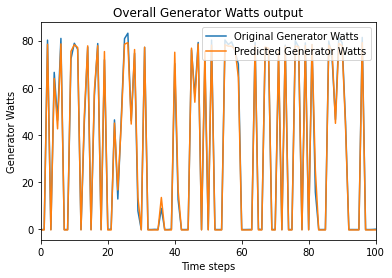

In [62]:
# plot the dataset with the first 100 predicted dataset
plt.plot(TestingData['Generate Watts'],label = 'Original Generator Watts')
plt.plot(TestingData['Predicted Watts'],label = 'Predicted Generator Watts')
plt.title('Overall Generator Watts output')
plt.xlabel('Time steps')
plt.ylabel('Generator Watts')
plt.legend(loc = 1)
plt.xlim([0, 100])
plt.show()

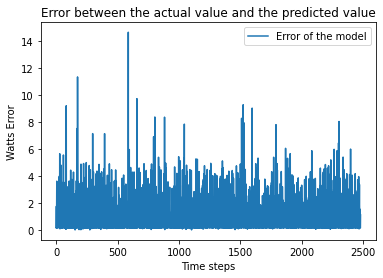

The Average Error: 1.2249424420916317


In [63]:
# plot the accuracy of the model
plt.plot(TestingData['Error'],label = 'Error of the model')
plt.title('Error between the actual value and the predicted value')
plt.xlabel('Time steps')
plt.ylabel('Watts Error')
plt.legend(loc = 1)
#plt.xlim([0, 100])
plt.show()
print('The Average Error:', np.mean(Error))

In [91]:
# row['GT1 Compressor Discharge Press Max Select {Avg}'] < 5, item[2]
# and row['GT1 IGV angle in deg {Avg}'] < 35, item[1] < 35, item[1]
predic = list(Predictions)
text_original = PredictorScaler.inverse_transform(X_test)
res = []
for i in range(len(text_original)):
    if text_original[i][2] < 5 and text_original[i][1] < 35:
        res.append(0)
    else:
        res.append(predic[i][0])
Combine_res = np.asarray(res)

In [92]:
# Analysis the Combine model:

TestingData1=pd.DataFrame(data=Test_Data, columns=select_variable)
TestingData1['Generate Watts']=y_test_orig
TestingData1['Predicted Watts']=Combine_res
TestingData1.head()

# Calculate the error between the actual value and the predicted value
Error=abs(TestingData1['Generate Watts']-TestingData1['Predicted Watts'])# Computing the absolute percent error
TestingData1['Error']=Error

# Finding the R^2 of the model
corr_matrix = np.corrcoef(TestingData1['Generate Watts'], TestingData1['Predicted Watts'])
corr = corr_matrix[0,1]
R_sq = corr**2
print('The R^2 of ANN model is:', R_sq)
TestingData1.head()

The R^2 of ANN model is: 0.998993271027454


,GT1 Exhaust Temp Median Corrected By Average {Avg},GT1 IGV angle in deg {Avg},GT1 Compressor Discharge Press Max Select {Avg},GT1 Compressor Discharge Temperature {Avg},med_exh_tem_average,IGV_ang_average,com_disch_pre_max_average,com_disch_tem_average,Generate Watts,Predicted Watts,Error
0,72.354564,31.998320,0.024077,74.766100,72.475890,32.004072,0.004851,74.759624,-0.025003,0.000000,0.025003
1,73.804041,32.082043,-0.028945,74.357519,73.738696,32.075006,-0.031021,74.274502,-0.020082,0.000000,0.020082
2,1049.356520,83.985763,158.930957,613.074592,1049.140614,83.985676,158.994308,612.852848,80.174592,79.932526,0.242066
3,69.316331,31.980394,-0.550947,67.468134,69.298917,31.980366,-0.541962,67.462462,-0.017439,0.000000,0.017439
4,1053.125764,72.968475,146.110998,658.507256,1063.494101,65.120012,136.053092,641.705870,66.520299,67.042351,0.522052


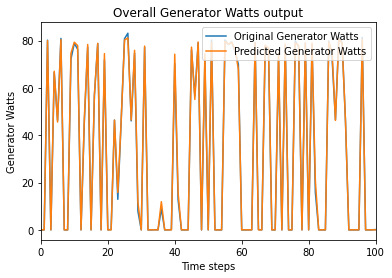

In [93]:
# plot the dataset with the first 100 predicted dataset
plt.plot(TestingData1['Generate Watts'],label = 'Original Generator Watts')
plt.plot(TestingData1['Predicted Watts'],label = 'Predicted Generator Watts')
plt.title('Overall Generator Watts output')
plt.xlabel('Time steps')
plt.ylabel('Generator Watts')
plt.legend(loc = 1)
plt.xlim([0, 100])
plt.show()

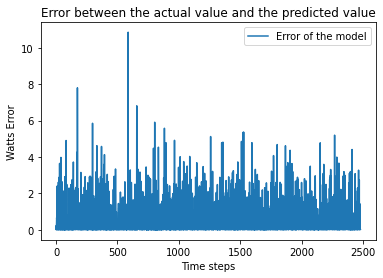

The Average Error: 0.6589024247075902


In [94]:
# plot the accuracy of the model
plt.plot(TestingData1['Error'],label = 'Error of the model')
plt.title('Error between the actual value and the predicted value')
plt.xlabel('Time steps')
plt.ylabel('Watts Error')
plt.legend(loc = 1)
#plt.xlim([0, 100])
plt.show()
print('The Average Error:', np.mean(Error))

In [95]:
# The Average Error decrease a lot 
# From 1.2249424420916317 to 0.6589024247075902
def name():
    return 'Shengbin Wang'
# Reference:
# https://machinelearningmastery.com/grid-search-hyperparameters-deep-learning-models-python-keras/
# https://www.askpython.com/python/coefficient-of-determination
# https://www.bogotobogo.com/python/scikit-learn/Artificial-Neural-Network-ANN-1-Introduction.php
# https://thinkingneuron.com/how-to-find-best-hyperparameters-using-gridsearchcv-in-python/
# https://thinkingneuron.com/using-artificial-neural-networks-for-regression-in-python/

In [109]:
input = np.array([[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]])
class ANN_model():
    def output(input):
        if input[2] < 5 and input[1] < 35:
            return 0
        else:
            tem = PredictorScaler.transform(input)
            test = model.predict(tem)
            resl = TargetVarScaler.inverse_transform(test)
            return resl

In [110]:
import pickle
pickle.dump(ANN_model, open( "ann_model", "wb" ))